Transaction Analysis:
Total Transactions: 985
Distribution of Transaction Amounts:
  Small Transactions: 745
  Medium Transactions: 164
  Large Transactions: 76
Frequency of Different Transaction Types:
  Debit Transactions: 695
  Credit Transactions: 290


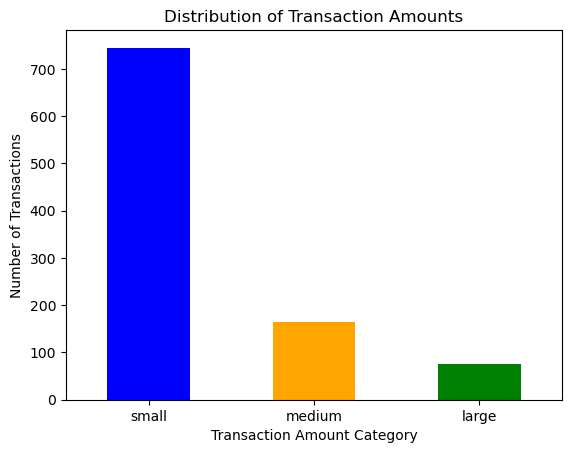

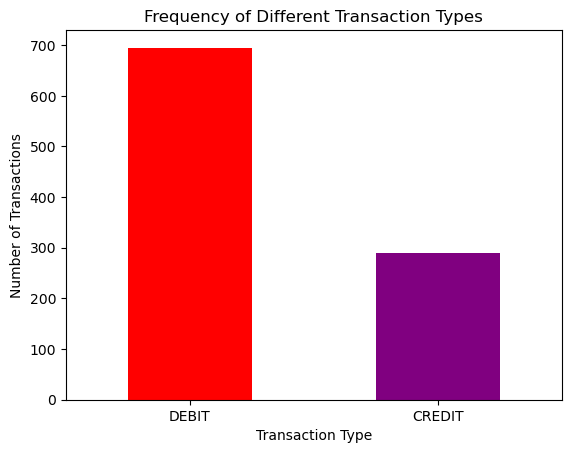

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

# Load the JSON data from the file
file_path = 'C:/Users/Asus/.vscode/P1- BankStatements.json'
with open(file_path, 'r') as file:
    data = json.load(file)

# Extract the transactions
transactions = data['Account']['Transactions']['Transaction']

# Convert the transactions data into a pandas DataFrame
transactions_df = pd.DataFrame(transactions)

# Convert the 'amount' column to numeric
transactions_df['amount'] = pd.to_numeric(transactions_df['amount'])

# Calculate the total number of transactions
total_transactions = transactions_df.shape[0]

# Define thresholds for small and large transactions
small_threshold = 500
large_threshold = 2000

# Classify transactions by amount
transactions_df['amount_category'] = pd.cut(
    transactions_df['amount'],
    bins=[-float('inf'), small_threshold, large_threshold, float('inf')],
    labels=['small', 'medium', 'large']
)

# Count transactions by amount category
amount_distribution = transactions_df['amount_category'].value_counts()

# Count transactions by type
transaction_type_distribution = transactions_df['type'].value_counts()

# Prepare the results
transaction_analysis = {
    'total_transactions': total_transactions,
    'amount_distribution': amount_distribution.to_dict(),
    'transaction_type_distribution': transaction_type_distribution.to_dict()
}

print("Transaction Analysis:")
print(f"Total Transactions: {transaction_analysis['total_transactions']}")
print("Distribution of Transaction Amounts:")
for category, count in transaction_analysis['amount_distribution'].items():
    print(f"  {category.capitalize()} Transactions: {count}")
print("Frequency of Different Transaction Types:")
for t_type, count in transaction_analysis['transaction_type_distribution'].items():
    print(f"  {t_type.capitalize()} Transactions: {count}")

# Visualization for the distribution of transaction amounts
amount_distribution.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.show()

# Visualization for the frequency of different transaction types
transaction_type_distribution.plot(kind='bar', color=['red', 'purple'])
plt.title('Frequency of Different Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.show()


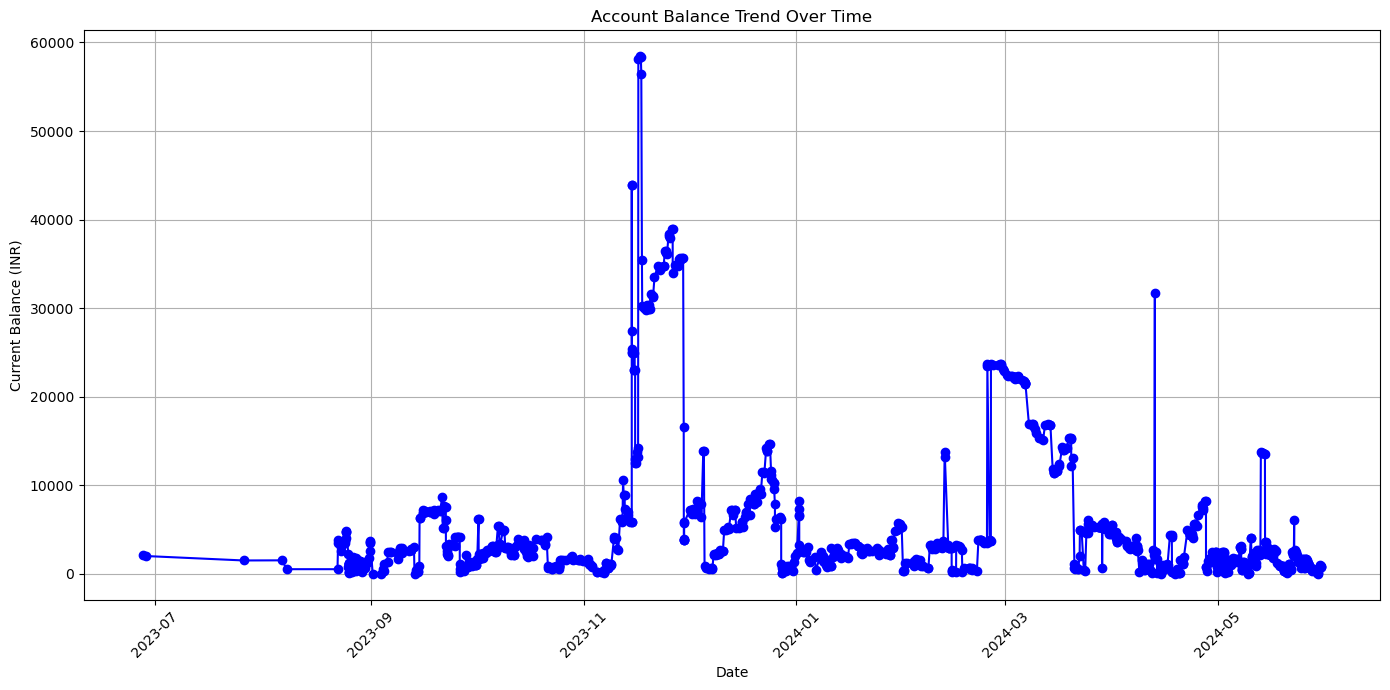

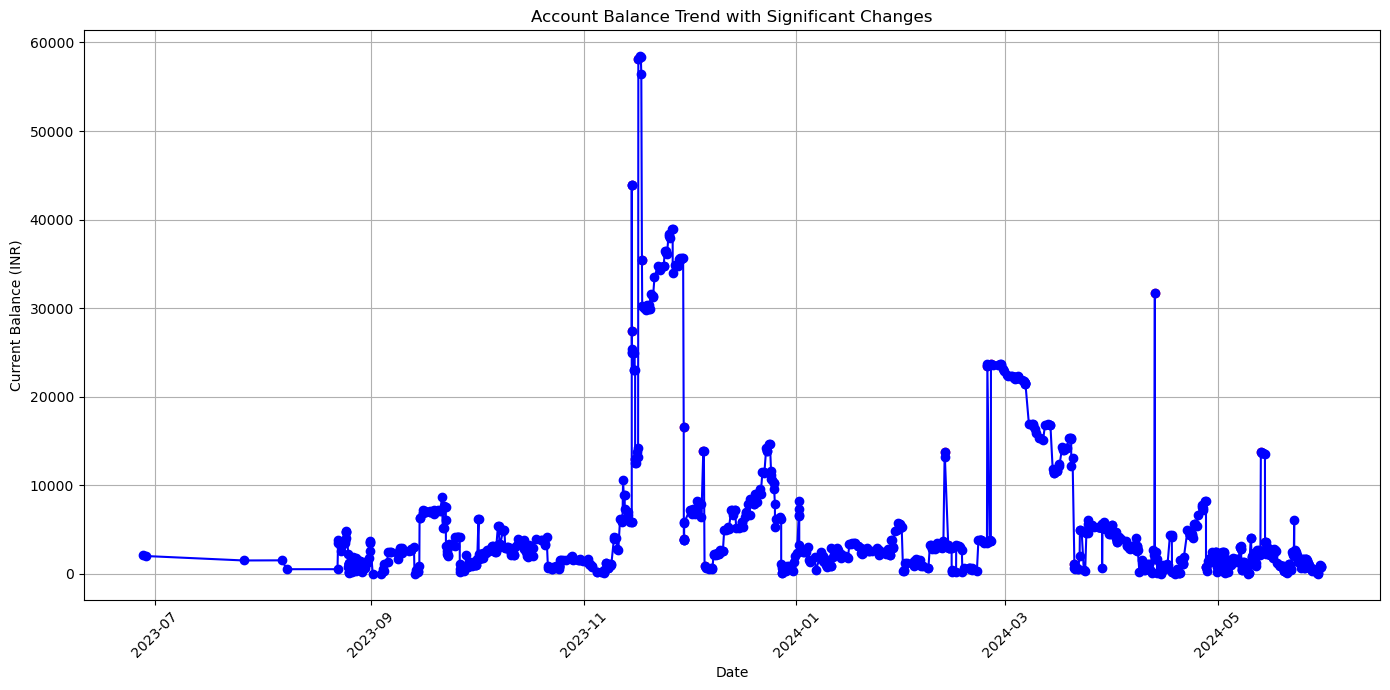

         transactionTimestamp  currentBalance  balance_change
275 2023-11-14 18:31:11+05:30        43892.80         37999.0
277 2023-11-14 18:49:41+05:30        27391.80        -16500.0
285 2023-11-15 17:48:21+05:30        12970.80        -10000.0
291 2023-11-16 15:51:14+05:30        58180.80         45000.0
295 2023-11-17 16:34:54+05:30        35400.80        -21000.0
332 2023-11-29 16:15:33+05:30        16625.80        -19000.0
333 2023-11-29 17:09:47+05:30         3925.80        -12700.0
351 2023-12-05 07:08:30+05:30        13925.80          7560.0
353 2023-12-05 15:50:06+05:30          865.80        -13000.0
535 2024-02-12 13:22:57+05:30        13744.81         10000.0
537 2024-02-13 14:01:51+05:30         3244.81        -10000.0
570 2024-02-24 18:55:15+05:30        23483.91         20000.0
572 2024-02-25 11:08:34+05:30         3683.91        -20000.0
576 2024-02-25 20:08:58+05:30        23664.91         20000.0
648 2024-03-20 18:56:48+05:30         1119.11        -12000.0
743 2024

In [2]:
# Extract transactions
transactions = data['Account']['Transactions']['Transaction']

# Create a DataFrame
df = pd.DataFrame(transactions)

# Convert 'transactionTimestamp' to datetime and sort by it
df['transactionTimestamp'] = pd.to_datetime(df['transactionTimestamp'])
df = df.sort_values('transactionTimestamp')

# Convert 'currentBalance' to numeric
df['currentBalance'] = pd.to_numeric(df['currentBalance'], errors='coerce')

# Plot the trend of account balance over time
plt.figure(figsize=(14, 7))
plt.plot(df['transactionTimestamp'], df['currentBalance'], marker='o', linestyle='-', color='b')
plt.title('Account Balance Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Current Balance (INR)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot to a file
plt.savefig('account_balance_trend.png')
plt.show()

# Calculate daily balance changes
df['balance_change'] = df['currentBalance'].diff()

# Define a threshold for significant change (e.g., 10% of the maximum balance)
threshold = 0.1 * df['currentBalance'].max()

# Identify periods with significant changes
significant_changes = df[abs(df['balance_change']) > threshold]

# Plot significant changes
plt.figure(figsize=(14, 7))
plt.plot(df['transactionTimestamp'], df['currentBalance'], marker='o', linestyle='-', color='b')
plt.scatter(significant_changes['transactionTimestamp'], significant_changes['currentBalance'], color='r')
plt.title('Account Balance Trend with Significant Changes')
plt.xlabel('Date')
plt.ylabel('Current Balance (INR)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot to a file
plt.savefig('significant_balance_changes.png')
plt.show()

# Print significant changes
print(significant_changes[['transactionTimestamp', 'currentBalance', 'balance_change']])

          category                                       total_amount  \
0   ATM Withdrawal                                1000.010000.02500.0   
1            Other                                100.0170.0500.060.0   
2  UPI Transaction  1.01200.0140.080.030.02480.01450.0120.01.01.01...   

   frequency  
0          3  
1          4  
2        688  


C:\Users\Asus\AppData\Local\Temp\ipykernel_1348\3905962854.py:53: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


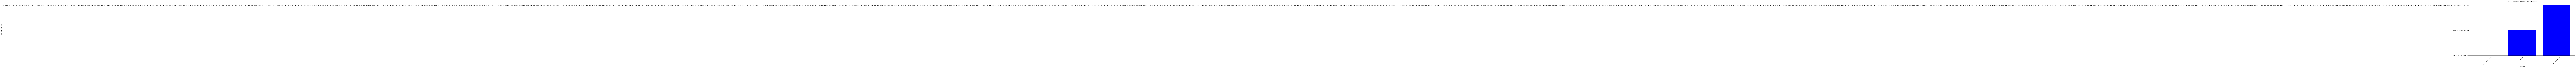

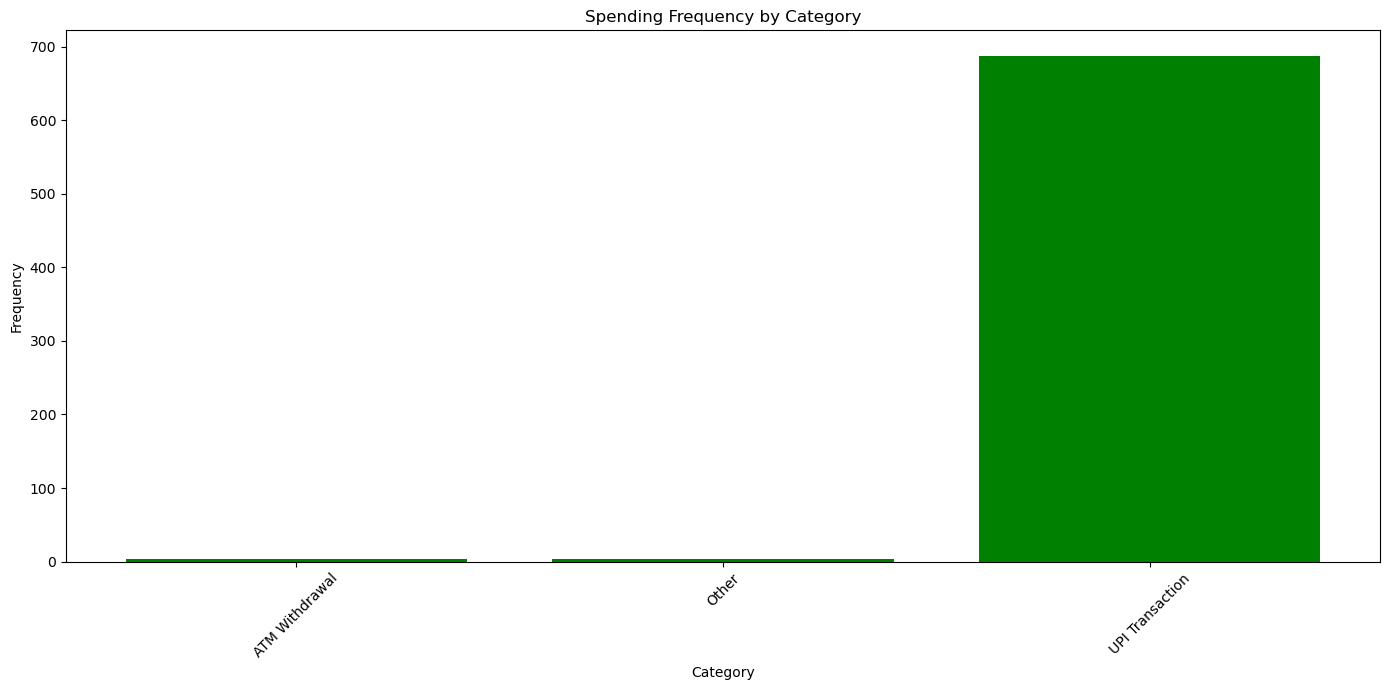

<Figure size 640x480 with 0 Axes>

In [3]:
# Extract transactions
transactions = data['Account']['Transactions']['Transaction']

# Create a DataFrame
df = pd.DataFrame(transactions)

# Convert 'transactionTimestamp' to datetime and sort by it
df['transactionTimestamp'] = pd.to_datetime(df['transactionTimestamp'])
df = df.sort_values('transactionTimestamp')

# Convert 'currentBalance' to numeric
df['currentBalance'] = pd.to_numeric(df['currentBalance'], errors='coerce')

# Define categories based on narration
def categorize_expense(narration):
    if 'fuel' in narration.lower():
        return 'Fuel'
    elif 'ecommerce' in narration.lower() or 'amazon' in narration.lower():
        return 'Ecommerce'
    elif 'food' in narration.lower() or 'restaurant' in narration.lower():
        return 'Food'
    elif 'shopping' in narration.lower() or 'mall' in narration.lower():
        return 'Shopping'
    elif 'atm' in narration.lower():
        return 'ATM Withdrawal'
    elif 'upi' in narration.lower():
        return 'UPI Transaction'
    else:
        return 'Other'

# Apply the categorization
df['category'] = df['narration'].apply(categorize_expense)

# Filter out credit transactions as we are focusing on expenses
expense_df = df[df['type'] == 'DEBIT']

# Analyze the frequency and amount of spending in each category
category_summary = expense_df.groupby('category').agg(
    total_amount=('amount', 'sum'),
    frequency=('amount', 'count')
).reset_index()

# Display category summary
print(category_summary)

# Plot the spending amount by category
plt.figure(figsize=(14, 7))
plt.bar(category_summary['category'], category_summary['total_amount'], color='b')
plt.title('Total Spending Amount by Category')
plt.xlabel('Category')
plt.ylabel('Total Amount (INR)')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot to a file
plt.savefig('total_spending_amount_by_category.png')
plt.show()

# Plot the spending frequency by category
plt.figure(figsize=(14, 7))
plt.bar(category_summary['category'], category_summary['frequency'], color='g')
plt.title('Spending Frequency by Category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optional: Save the plot to a file
plt.savefig('spending_frequency_by_category.png')

plt.show()

  income_category                                       total_amount  \
0           Other  15.01.01.051.0850.0600.0600.0170.0350.0750.085...   
1      UPI Credit  3000.0300.0400.0500.0300.0400.0750.0480.021.05...   

   frequency  
0        189  
1        101  


C:\Users\Asus\AppData\Local\Temp\ipykernel_1348\2308293868.py:47: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


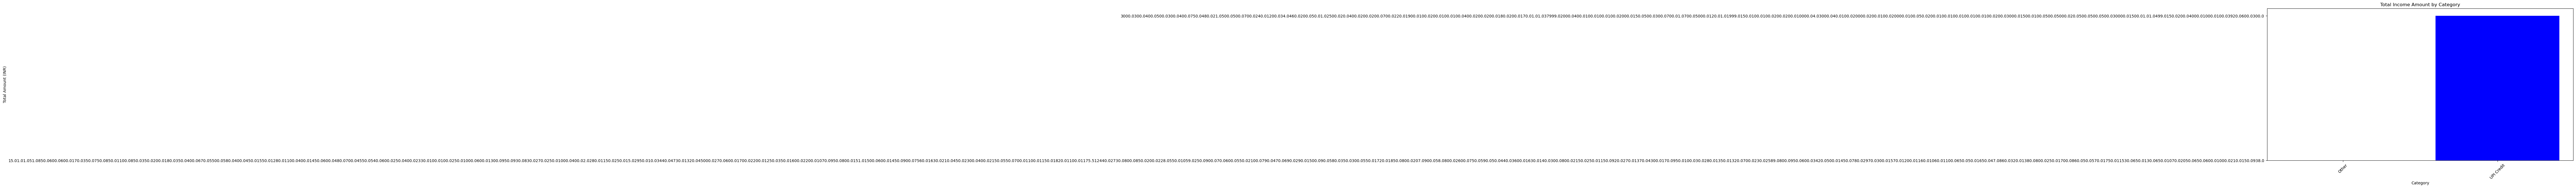

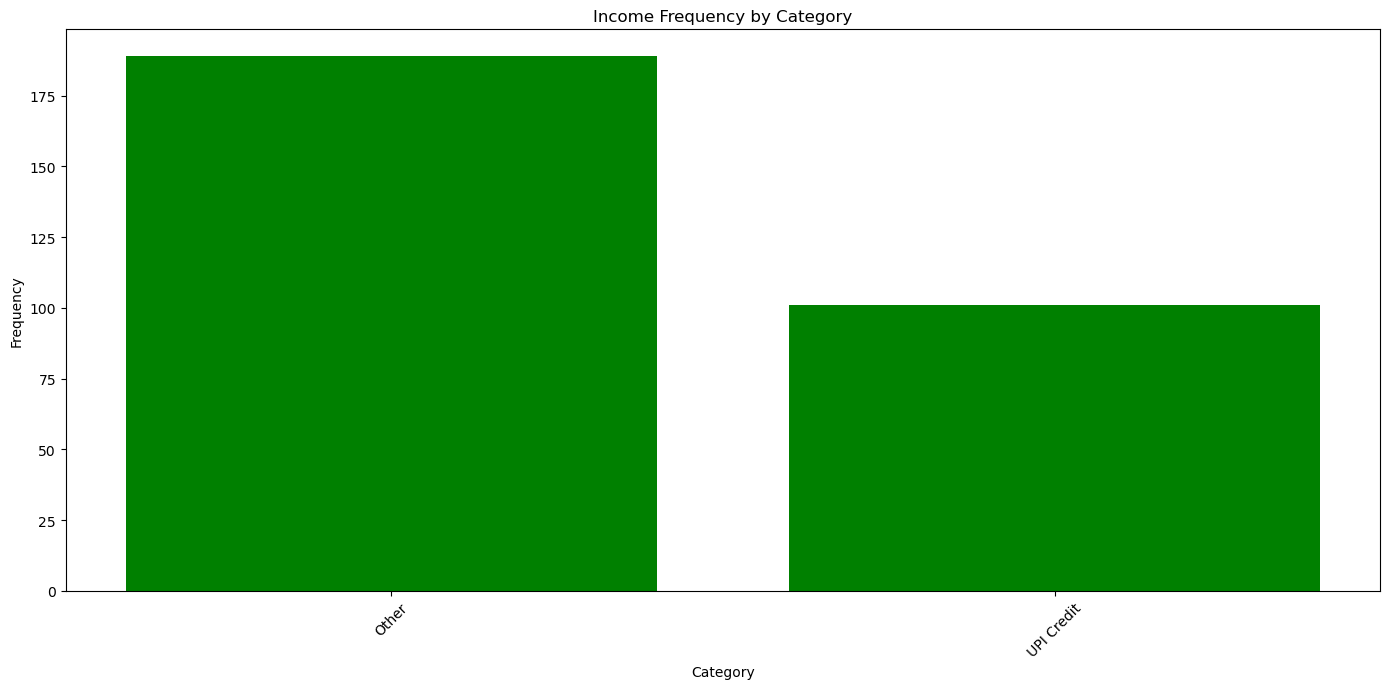

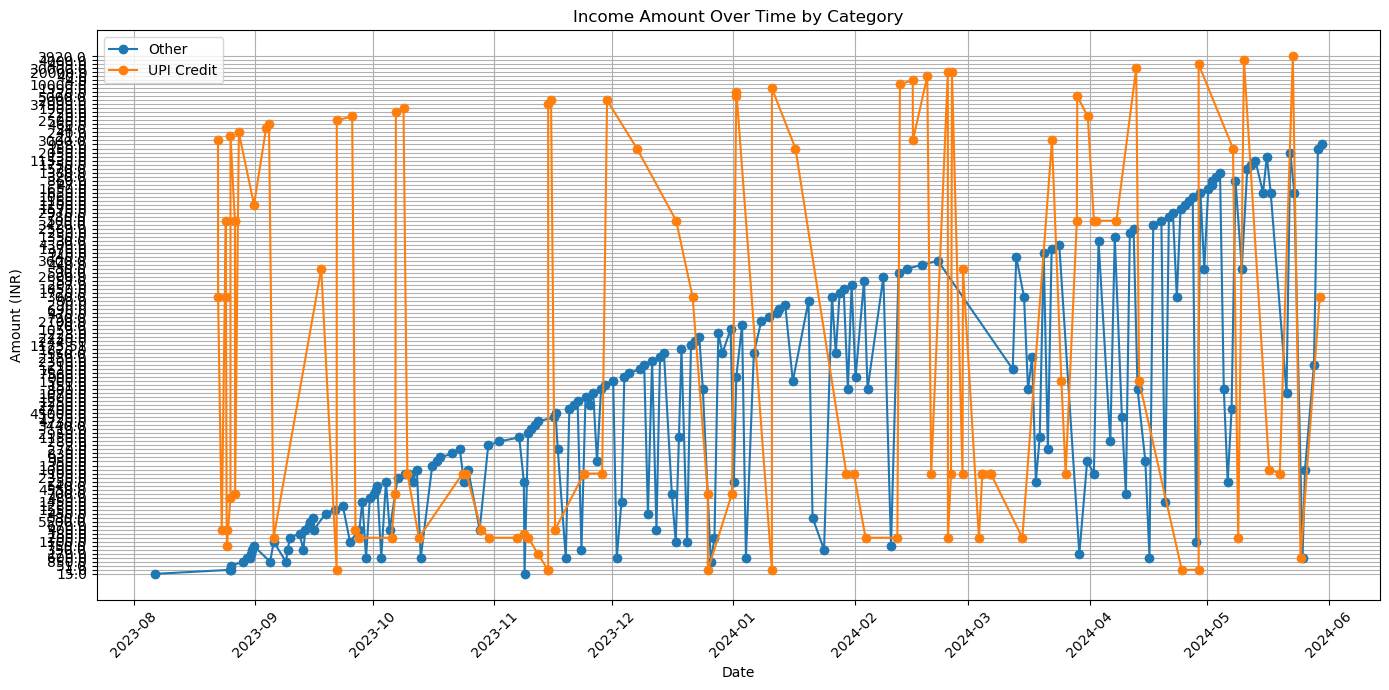

In [4]:
# Extract transactions
transactions = data['Account']['Transactions']['Transaction']

# Create a DataFrame
df = pd.DataFrame(transactions)

# Convert 'transactionTimestamp' to datetime and sort by it
df['transactionTimestamp'] = pd.to_datetime(df['transactionTimestamp'])
df = df.sort_values('transactionTimestamp')

# Convert 'currentBalance' to numeric
df['currentBalance'] = pd.to_numeric(df['currentBalance'], errors='coerce')

# Define categories based on narration for income
def categorize_income(narration):
    if 'salary' in narration.lower():
        return 'Salary'
    elif 'upi' in narration.lower():
        return 'UPI Credit'
    elif 'interest' in narration.lower():
        return 'Interest'
    else:
        return 'Other'

# Apply the categorization for income
df['income_category'] = df['narration'].apply(categorize_income)

# Filter out debit transactions as we are focusing on income
income_df = df[df['type'] == 'CREDIT']

# Analyze the frequency and amount of income in each category
income_summary = income_df.groupby('income_category').agg(
    total_amount=('amount', 'sum'),
    frequency=('amount', 'count')
).reset_index()

# Display income summary
print(income_summary)

# Plot the income amount by category
plt.figure(figsize=(14, 7))
plt.bar(income_summary['income_category'], income_summary['total_amount'], color='b')
plt.title('Total Income Amount by Category')
plt.xlabel('Category')
plt.ylabel('Total Amount (INR)')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot to a file
plt.savefig('total_income_amount_by_category.png')
plt.show()

# Plot the income frequency by category
plt.figure(figsize=(14, 7))
plt.bar(income_summary['income_category'], income_summary['frequency'], color='g')
plt.title('Income Frequency by Category')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot to a file
plt.savefig('income_frequency_by_category.png')
plt.show()

# Plot the income amount over time
plt.figure(figsize=(14, 7))
for category in income_summary['income_category']:
    category_df = income_df[income_df['income_category'] == category]
    plt.plot(category_df['transactionTimestamp'], category_df['amount'], marker='o', linestyle='-', label=category)
plt.title('Income Amount Over Time by Category')
plt.xlabel('Date')
plt.ylabel('Amount (INR)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot to a file
plt.savefig('income_amount_over_time_by_category.png')
plt.show()

Suspicious Transactions:
       type    mode   amount  currentBalance      transactionTimestamp  \
275  CREDIT     UPI  37999.0        43892.80 2023-11-14 18:31:11+05:30   
277   DEBIT     UPI  16500.0        27391.80 2023-11-14 18:49:41+05:30   
285   DEBIT     UPI  10000.0        12970.80 2023-11-15 17:48:21+05:30   
291  CREDIT    CASH  45000.0        58180.80 2023-11-16 15:51:14+05:30   
295   DEBIT     UPI  21000.0        35400.80 2023-11-17 16:34:54+05:30   
332   DEBIT     UPI  19000.0        16625.80 2023-11-29 16:15:33+05:30   
333   DEBIT     UPI  12700.0         3925.80 2023-11-29 17:09:47+05:30   
351  CREDIT  OTHERS   7560.0        13925.80 2023-12-05 07:08:30+05:30   
353   DEBIT     UPI  13000.0          865.80 2023-12-05 15:50:06+05:30   
535  CREDIT     UPI  10000.0        13744.81 2024-02-12 13:22:57+05:30   
537   DEBIT     ATM  10000.0         3244.81 2024-02-13 14:01:51+05:30   
570  CREDIT     UPI  20000.0        23483.91 2024-02-24 18:55:15+05:30   
572   DEBIT  

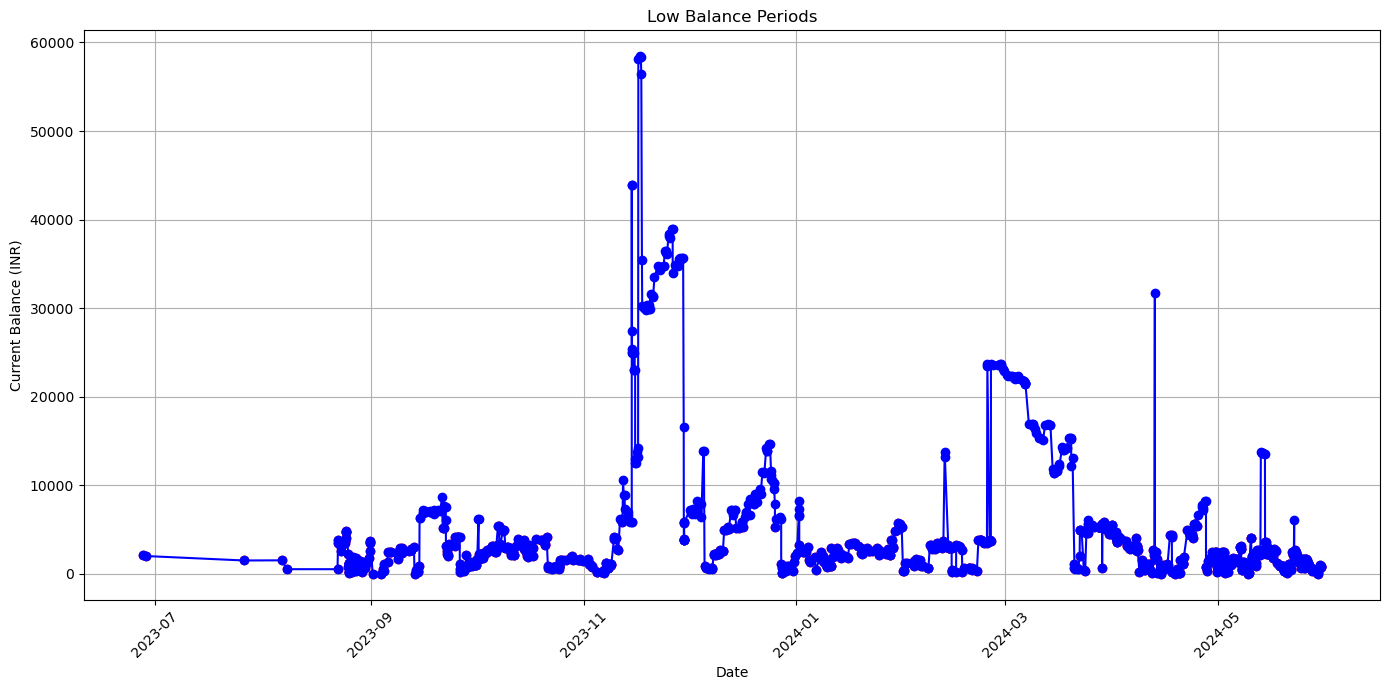

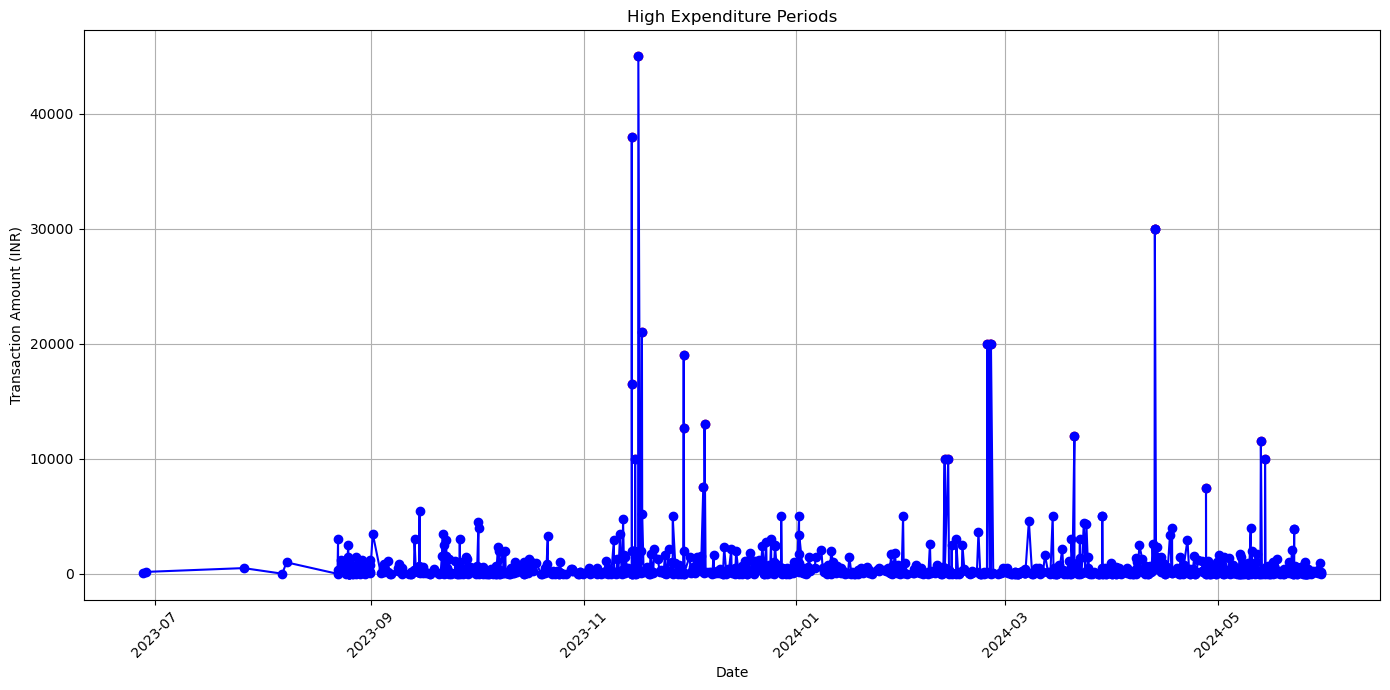

In [5]:
# Extract transactions
transactions = data['Account']['Transactions']['Transaction']

# Create a DataFrame
df = pd.DataFrame(transactions)

# Convert 'transactionTimestamp' to datetime and sort by it
df['transactionTimestamp'] = pd.to_datetime(df['transactionTimestamp'])
df = df.sort_values('transactionTimestamp')

# Convert 'currentBalance' to numeric
df['currentBalance'] = pd.to_numeric(df['currentBalance'], errors='coerce')

# Convert 'amount' to numeric
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')

# Define a threshold for high expenditure (e.g., 10% of the maximum balance)
high_expenditure_threshold = 0.1 * df['currentBalance'].max()

# Define a threshold for low balance (e.g., 10% of the maximum balance)
low_balance_threshold = 0.1 * df['currentBalance'].max()

# Identify unusual or suspicious transactions
def identify_suspicious(transaction):
    if transaction['amount'] > high_expenditure_threshold:
        return True
    if 'suspicious' in transaction['narration'].lower():
        return True
    return False

df['is_suspicious'] = df.apply(identify_suspicious, axis=1)

# Generate alerts for low balance periods
low_balance_alerts = df[df['currentBalance'] < low_balance_threshold]

# Generate alerts for high expenditure periods
high_expenditure_alerts = df[df['amount'] > high_expenditure_threshold]

# Display suspicious transactions
print("Suspicious Transactions:")
print(df[df['is_suspicious']])

# Display low balance alerts
print("\nLow Balance Alerts:")
print(low_balance_alerts)

# Display high expenditure alerts
print("\nHigh Expenditure Alerts:")
print(high_expenditure_alerts)

# Plot low balance periods
plt.figure(figsize=(14, 7))
plt.plot(df['transactionTimestamp'], df['currentBalance'], marker='o', linestyle='-', color='b')
plt.scatter(low_balance_alerts['transactionTimestamp'], low_balance_alerts['currentBalance'], color='r')
plt.title('Low Balance Periods')
plt.xlabel('Date')
plt.ylabel('Current Balance (INR)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot to a file
plt.savefig('low_balance_periods.png')
plt.show()

# Plot high expenditure periods
plt.figure(figsize=(14, 7))
plt.plot(df['transactionTimestamp'], df['amount'], marker='o', linestyle='-', color='b')
plt.scatter(high_expenditure_alerts['transactionTimestamp'], high_expenditure_alerts['amount'], color='r')
plt.title('High Expenditure Periods')
plt.xlabel('Date')
plt.ylabel('Transaction Amount (INR)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot to a file
plt.savefig('high_expenditure_periods.png')
plt.show()